### Importing Libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.preprocessing import LabelEncoder,StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [109]:
rice=pd.read_excel('Rice_MSC_Dataset.xlsx')
rice.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,0.5114,0.4751,0.0269,0.0062,0.2257,0.9863,222.9805,223.9872,241.4758,16.2950,16.4354,13.6272,-0.7986,-0.8407,-3.7377,7.1706,7.1197,23.5566,-4225152256,-4267165440,-5014238208,0.6532,0.0780,0.9470,0.0516,0.0358,0.0534,-6.2345,-0.3859,-3.7366,79.7876,2.1248,23.5552,2802.0408,265.6183,701.6497,228.0955,130.1179,119.2036,14.5928,1.6133,4.3298,-1.1189,0.0608,0.3568,8.6096,2.1559,2.1246,-4432724480,-1286927360,-1062276608,209.8105,135.7502,126.1657,13.5906,3.7538,0.9819,-1.0936,-0.4188,0.1943,8.3887,2.1507,3.3297,-3693353216,-1414067840,-1202124032,0.7355,0.7594,0.9475,0.1067,0.1166,0.1080,-0.4876,-0.2667,-2.4022,5.4413,4.6547,13.5992,2388.4263,2222.7087,512.8892,111.4315,111.9330,120.6838,0.3266,0.0390,0.4733,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,0.8120,0.7065,0.0184,0.0093,0.4992,0.9888,206.0380,206.2412,213.3809,18.3863,18.5343,18.9969,-0.7536,-0.7372,-0.8217,4.4926,4.4713,4.4922,-3428633856,-3436527616,-3701304832,0.6542,0.0354,0.8368,0.0535,0.0143,0.0745,-9.7857,0.8650,-0.8208,119.7635,3.4847,4.4913,2696.2507,68.2768,1764.4907,211.4882,128.7362,124.4154,17.0760,0.7826,1.7041,-0.8311,0.9045,-0.5643,4.8704,3.7122,2.4539,-3623472640,-1208159104,-1120711552,193.7512,131.0736,127.1655,15.8972,1.3851,0.3717,-0.7533,0.7497,1.8000,4.4987,2.9312,4.2389,-2992325376,-1257189760,-1175834752,0.6035,0.6294,0.7289,0.1152,0.1207,0.1386,-0.3131,-0.2934,-0.3768,2.9232,2.9286,2.8833,2567.9663,2531.9880,2189.7100,102.9773,103.0778,106.6464,0.3270,0.0177,0.4182,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,0.6505,0.5689,0.0277,0.0091,0.3236,0.9865,201.8228,217.6475,235.0057,13.7392,15.3239,16.0249,-2.2606,-2.6764,-2.8690,12.4329,13.0172,13.4749,-2228499200,-2629524480,-3108116224,0.5875,0.1409,0.9216,0.0131,0.0183,0.0628,1.4178,-0.8871,-2.8691,11.9584,5.5929,13.4749,1879.6370,400.6435,656.2015,219.5361,125.2797,117.4914,13.8545,1.0867,1.7036,-2.7675,1.2988,0.4409,13.8206,7.0239,5.1960,-2676372224,-777033216,-674463936,200.5582,137.9440,119.6659,12.7435,1.5291,1.6526,-2.6443,-0.6828,1.5534,13.1546,6.0969,5.4741,-2196389376,-960911488,-702334144,0.6472,0.6897,0.8902,0.0883,0.0953,0.1203,-1.9035,-1.9296,-2.2574,9.4334,9.4209,9.8885,1790.9473,1715.9330,757.2745,100.8594,108.7688,117.4546,0.2938,0.0705,0.4606,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,0.5256,0.5007,0.0252,0.0064,0.2507,0.9859,228.8978,229.7151,244.6294,18.3915,18.9141,16.7398,-1.5281,-1.4967,-3.5705,8.1541,7.8216,17.9112,-4586280960,-4623998464,-5290343936,0.6155,0.0658,0.9595,0.1407,0.0385,0.0655,-3.5418,-0.1676,-3.5726,15.2393,1.7312,17.9282,2743.6218,219.5903,514.2898,233.0965,129.8081,120.5208,16.8280,1.7279,4.8413,-1.7808,0.2575,0.0997,9.3

### Performing EDA

In [110]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [111]:
null_counts=rice.isna().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

skewB         6
kurtosisB     6
skewCb        3
kurtosisCb    3
skewCr        2
kurtosisCr    2
dtype: int64

In [112]:
rice['skewB'].fillna(round(rice['skewB'].mean(),2),inplace=True)
rice['kurtosisB'].fillna(round(rice['skewB'].mean(),2),inplace=True)
rice['skewCb'].fillna(round(rice['skewB'].mean(),2),inplace=True)
rice['kurtosisCb'].fillna(round(rice['skewB'].mean(),2),inplace=True)
rice['skewCr'].fillna(round(rice['skewB'].mean(),2),inplace=True)
rice['kurtosisCr'].fillna(round(rice['skewB'].mean(),2),inplace=True)

In [113]:
rice[['skewB','kurtosisB','skewCb','kurtosisCb','skewCr','kurtosisCr']].describe().T

,count,mean,std,min,25%,50%,75%,max
skewB,75000.0,0.529481,0.997065,-3.1682,-0.049300,0.58160,1.081900,8.5405
kurtosisB,75000.0,4.730299,2.966206,0.5300,2.905450,3.92750,5.611400,73.8820
skewCb,75000.0,-0.471390,1.226897,-7.5012,-1.080800,-0.58610,0.100225,120.6575
kurtosisCb,75000.0,5.128554,58.357234,0.5300,2.847500,3.95935,5.734225,14559.1611
skewCr,75000.0,1.734346,7.868672,-9.5813,0.140775,0.60620,1.343700,116.3182
kurtosisCr,75000.0,67.688228,560.170312,0.5300,2.638800,3.57195,5.356425,13529.9463


In [114]:
rice.skew()

AREA               1.218877
PERIMETER          0.378366
MAJOR_AXIS         0.127872
MINOR_AXIS         0.269072
ECCENTRICITY      -0.548756
EQDIASQ            1.012696
SOLIDITY          -0.785388
CONVEX_AREA        1.214490
EXTENT            -0.636065
ASPECT_RATIO       0.802553
ROUNDNESS         -0.362282
COMPACTNESS       -0.197621
SHAPEFACTOR_1      0.351564
SHAPEFACTOR_2      0.276983
SHAPEFACTOR_3      0.008738
SHAPEFACTOR_4     -1.079869
meanRR             0.234153
meanRG             0.228064
meanRB            -0.540163
StdDevRR           0.108645
StdDevRG           0.051306
StdDevRB           0.093186
skewRR            -0.731163
skewRG            -1.056324
skewRB            -0.390048
kurtosisRR         1.575875
kurtosisRG         1.935792
kurtosisRB         1.299050
entropyRR         -1.314471
entropyRG         -1.247613
entropyRB         -1.109289
meanH             -1.317310
meanS              0.426711
meanV             -0.580431
StdDevH            2.078049
StdDevS            1

In [115]:
rice.drop_duplicates(keep='first',inplace=True)

<Figure size 1080x720 with 0 Axes>

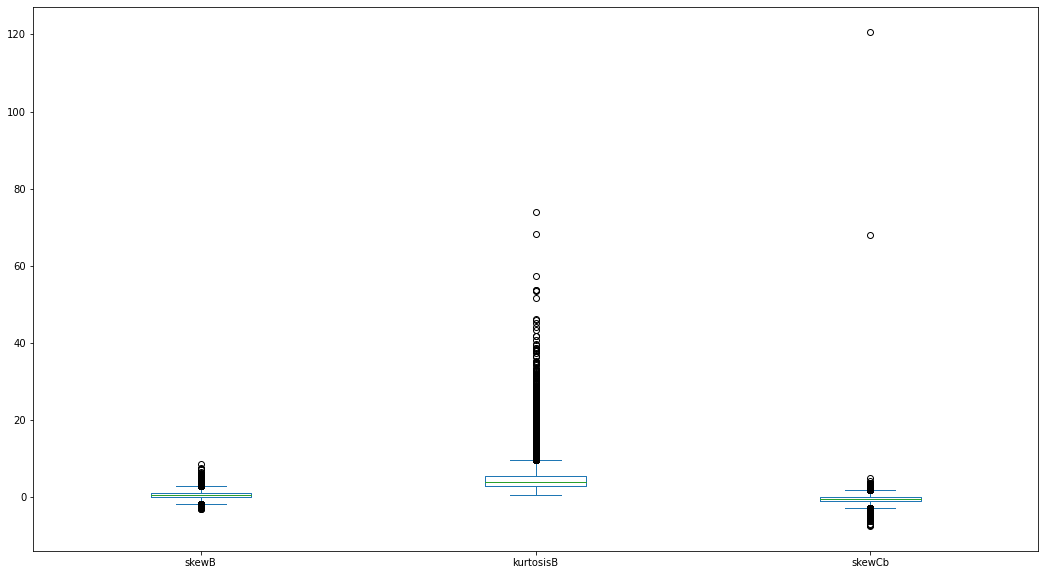

In [116]:
plt.figure(figsize=(15,10))
#rice[['skewB','kurtosisB','skewCb','kurtosisCb','skewCr','kurtosisCr']].plot(kind='box',figsize=(15,10))
rice[['skewB','kurtosisB','skewCb']].plot(kind='box',figsize=(18,10))
plt.show()

In [117]:
rice.corr()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
AREA,1.000000,0.840376,0.624920,0.779815,0.023918,0.997146,0.069230,0.999758,0.098731,-0.159857,0.093381,0.091770,-0.662464,-0.608002,0.060659,0.069094,0.734177,0.733217,0.305495,-0.542714,-0.553058,-0.570347,-0.544442,-0.583664,-0.250879,0.627472,0.641428,0.467039,-0.983976,-0.984465,-0.975929,-0.880095,-0.442868,0.450089,0.298062,-0.165811,-0.603528,0.455175,0.439466,-0.443645,-0.211012,0.260346,0.578896,-0.115029,-0.195526,0.466320,0.731044,-0.410050,0.677181,-0.575325,-0.261959,-0.206064,-0.567780,-0.140757,0.274213,0.634960,0.048236,0.236272,-0.987856,-0.994624,-0.990923,0.724904,-0.670289,0.178277,-0.557907,-0.211694,0.141345,-0.558521,-0.225104,-0.055719,0.631420,0.022210,-0.033810,-0.987376,-0.984898,-0.993639,0.715514,0.737005,0.376014,-0.411978,-0.396910,-0.489466,-0.532347,-0.567739,-0.242263,0.613374,0.625694,0.480643,0.922951,0.726758,0.365755,0.734544,0.733522,0.306630,-0.880137,-0.442900,0.451017,0.731378,-0.410077,0.677226,0.725254,-0.670329,0.178224,0.715855,0.737288,0.376888
PERIMETER,0.840376,1.000000,0.945085,0.336174,0.487949,0.849685,-0.225014,0.845745,-0.255141,0.388692,-0.442093,-0.432761,-0.195028,-0.924205,-0.449284,-0.210583,0.692856,0.752686,0.498675,-0.450395,-0.455562,-0.609839,-0.343826,-0.419054,-0.466807,0.465111,0.495132,0.564587,-0.830346,-0.847617,-0.871659,-0.693291,-0.242107,0.599234,0.208486,0.130186,-0.630785,0.411376,0.295036,-0.587240,-0.245682,0.099264,0.619078,0.073250,0.019027,0.195874,0.748133,-0.425381,0.475863,-0.498708,0.025884,0.038709,-0.414896,-0.078852,0.187301,0.495333,-0.087329,0.046279,-0.847360,-0.829226,-0.807456,0.742787,-0.459299,-0.029135,-0.483794,0.037511,0.347216,-0.415295,-0.166041,-0.085301,0.498430,0.009501,-0.059694,-0.846968,-0.862063,-0.814577,0.731192,0.747048,0.551988,-0.319128,-0.273204,-0.502872,-0.404594,-0.410442,-0.437461,0.499270,0.493895,0.565340,0.774759,0.598587,0.107080,0.693363,0.753067,0.499774,-0.693344,-0.242164,0.600131,0.748556,-0.425415,0.475902,0.743221,-0.459330,-0.029174,0.731587,0.747384,0.552814
MAJOR_AXIS,0.624920,0.945085,1.000000,0.012944,0.718450,0.635805,-0.337299,0.631972,-0.423680,0.663431,-0.701793,-0.697262,0.127004,-0.984757,-0.705908,-0.327457,0.572040,0.660502,0.527704,-0.367871,-0.369262,-0.579399,-0.194450,-0.281506,-0.533976,0.328686,0.361741,0.558272,-0.623304,-0.648109,-0.682512,-0.496045,-0.104173,0.591115,0.122078,0.265464,-0.591182,0.330276,0.170957,-0.597422,-0.232473,0.014833,0.572311,0.142223,0.123709,0.011229,0.654135,-0.388871,0.308800,-0.418117,0.168523,0.155337,-0.285205,-0.023110,0.123545,0.366372,-0.147038,-0.049916,-0.645174,-0.610012,-0.587609,0.649147,-0.288867,-0.144701,-0.407131,0.157732,0.417971,-0.290141,-0.117300,-0.092280,0.372962,0.001768,-0.069855,-0.644734,-0.659043,-0.592074,0.635989,0.648439,0.564465,-0.256192,-0.198349,-0.475448,-0.282019,-0.271214,-0.490716,0.385427,0.369806,0.552469,0.571777,0.427604,-0.052148,0.572556,0.660869,0.528635,-0.496096,-0.104238,0.591876,0.654547,-0.388904,0.308832,0.649566,-0.288889,-0.144725,0.636358,0.648757,0.565154

In [118]:
rice['CLASS'].value_counts()

Basmati      15000
Arborio      15000
Jasmine      15000
Karacadag    15000
Ipsala       14703
Name: CLASS, dtype: int64

In [119]:
le=LabelEncoder()
rice['CLASS']=le.fit_transform(rice['CLASS'])

In [120]:
pd.set_option('display.max_columns',None)

In [121]:
rice.sample(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
7803,4999,310.719,140.8320,45.9577,0.9453,79.7805,0.9741,5132,0.5220,3.0644,0.6507,0.5665,0.0282,0.0092,0.3209,0.9834,229.9286,233.1368,243.1648,13.3345,13.5629,13.5847,-2.9388,-3.0984,-3.7623,18.0426,18.6114,22.3898,-2886438144,-2975178240,-3260510464,0.6256,0.0546,0.9536,0.0273,0.0135,0.0533,-0.6327,-1.5034,-3.7617,16.5161,5.4788,22.3858,1827.7391,89.4204,393.0378,235.4483,128.1822,122.6167,12.2924,0.5792,1.4668,-3.2945,0.7351,1.6322,20.2114,6.3766,6.3950,-3037441280,-797317440,-723027200,216.3743,132.7803,125.6517,11.5473,1.3241,0.8122,-3.1665,-1.4635,0.8562,19.0497,5.7443,3.7546,-2525979648,-861847104,-763021632,0.7837,0.8205,0.9700,0.0900,0.0953,0.1072,-2.2992,-2.2154,-2.8756,12.5544,12.1654,15.0057,1403.6555,1223.0652,132.0785,114.9727,116.5764,121.5953,0.3127,0.0273,0.4768,117.7317,64.0918,61.3055,108.1948,66.3914,62.8253,0.3919,0.4103,0.4851,3
44974,7602,419.398,199.5046,49.4068,0.9689,98.3828,0.9790,7765,0.3777,4.0380,0.5431,0.4931,0.0262,0.0065,0.2432,0.9820,221.9227,224.8218,242.3741,17.3206,17.5109,16.2600,-1.3551,-1.4409,-3.6344,8.4280,8.5463,19.1124,-4076515840,-4193612032,-4931628032,0.6378,0.0845,0.9505,0.0457,0.0352,0.0638,-6.2589,-0.4732,-3.6344,88.7875,2.2481,19.1115,2755.2974,288.8615,613.4792,228.4700,129.5384,118.9462,15.7365,1.4563,4.1968,-1.7295,-0.0938,0.4060,9.9960,2.0724,2.1880,-4336434688,-1241133056,-1029618496,210.0559,136.0714,125.2936,14.6673,3.6452,1.1603,-1.6931,-0.4774,0.6478,9.6829,2.2084,2.8340,-3609554176,-1384397184,-1153110528,0.7367,0.7636,0.9569,0.1124,0.1215,0.1247,-1.0480,-0.7926,-2.7178,6.4951,5.6466,12.8397,2305.4766,2127.6438,302.8611,111.0022,112.4546,121.2375,0.3189,0.0423,0.4754,114.2758,64.7705,59.4703,105.0630,68.0380,62.6431,0.3686,0.3821,0.4788,1
3746,8228,353.095,143.6810,73.6029,0.8588,102.3534,0.9823,8376,0.7672,1.9521,0.8293,0.7124,0.0175,0.0089,0.5075,0.9906,200.8121,201.4216,206.3546,20.3607,20.6220,20.2907,-0.6457,-0.6496,-0.7274,4.9211,4.8897,5.1202,-3564851968,-3589479936,-3780698880,0.6455,0.0278,0.8092,0.0343,0.0086,0.0796,-10.9066,1.4194,-0.7274,213.3178,6.1632,5.1200,2986.4680,47.9682,2149.7512,206.8363,128.2557,125.4662,19.0393,0.4871,0.9163,-0.7627,1.7932,-1.2455,5.2641,5.8928,4.3096,-3794305792,-1313977728,-1251809920,189.3065,130.2392,127.1472,17.6001,0.7390,0.3543,-0.6553,1.8718,1.9919,4.9253,6.1196,4.9671,-3126432768,-1359248640,-1289041536,0.5704,0.5972,0.6796,0.1234,0.1302,0.1435,-0.0152,-0.0072,-0.0693,3.6292,3.6080,3.7018,2774.8081,2755.5361,2565.2644,100.3762,100.6802,103.1468,0.3229,0.0139,0.4045,103.3911,64.1278,62.7328,94.6287,65.1195,63.5740,0.2851,0.2985,0.3396,0
15793,5196,322.594,145.4400,46.4204,0.9477,81.3373,0.9599,5413,0.6162,3.1331,0.6274,0.5592,0.0280,0.0089,0.3128,0.9799,202.3089,204.5456,213.5568,14.1387,14.6238,15.1527,-2.3068,-2.3338,-2.4164,11.3352,11.2686,11.4497,-2272452608,-2328445952,-2558407424,0.6341,0.0529,0.8375,0.0284,0.0119,0.0594,-8.0292,-0.6340,-2.4158,192.5374,3.8335,11.4468,1896.2754,87.7724,1246.4938,209.6936,128.3745,123.1553,13.5648,0.6551,1.1841,-2.4498,1.4564,0.4839

#### There are 297 Duplicate records are exists and all are belongs to CLASS 2 

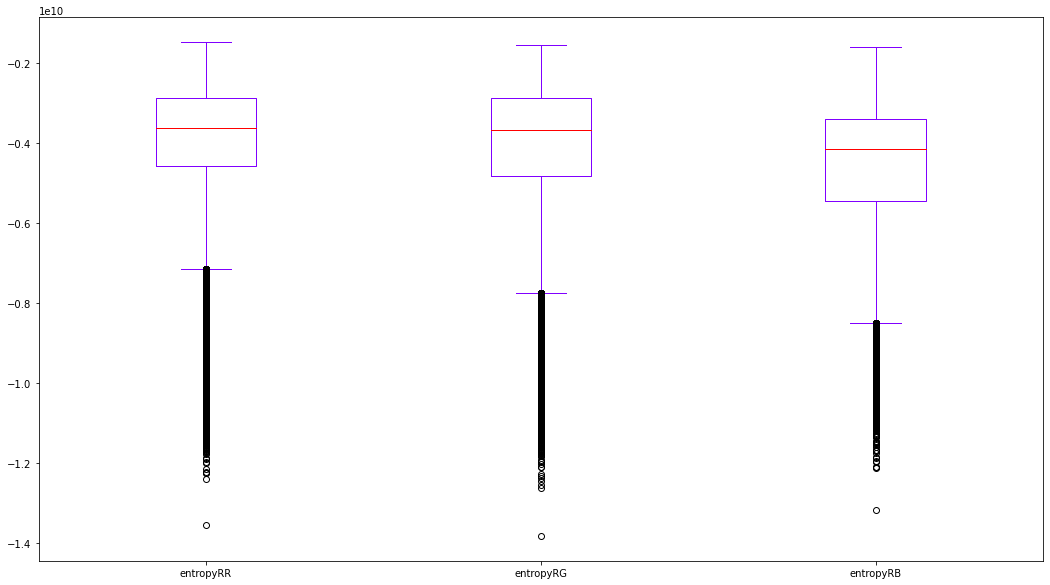

In [122]:
rice[['entropyRR','entropyRG','entropyRB']].plot(kind='box',figsize=(18,10),colormap='rainbow')
plt.show()

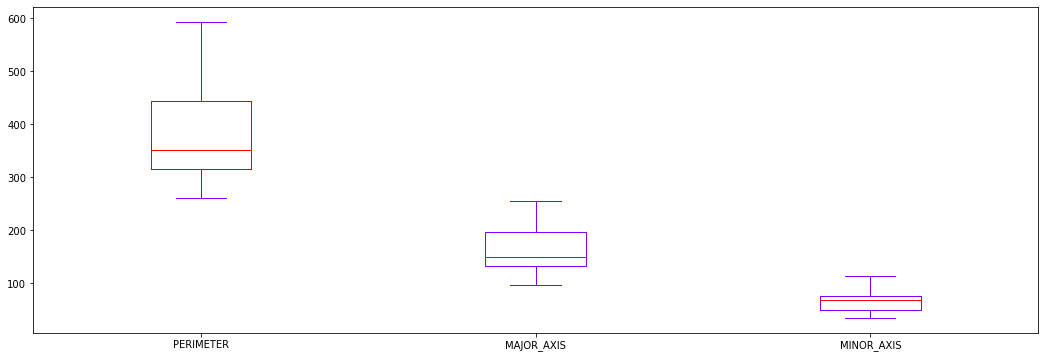

In [123]:
rice[['PERIMETER','MAJOR_AXIS','MINOR_AXIS']].plot(kind='box',figsize=(18,6),colormap='rainbow')
plt.show()

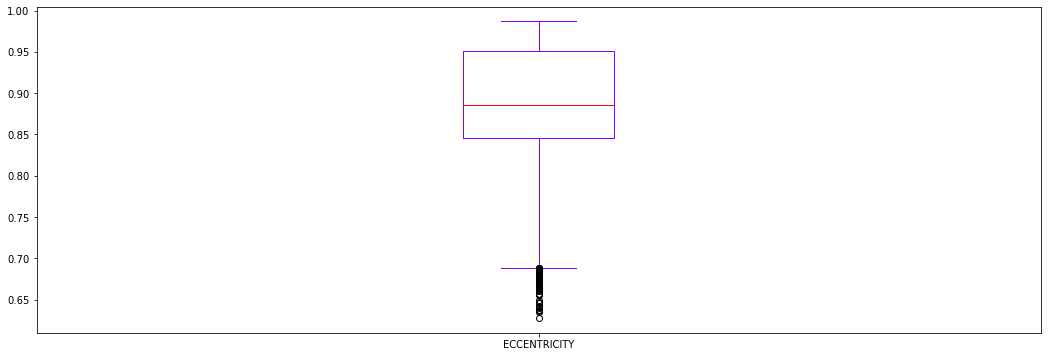

In [124]:
rice['ECCENTRICITY'].plot(kind='box',figsize=(18,6),colormap='rainbow')
plt.show()

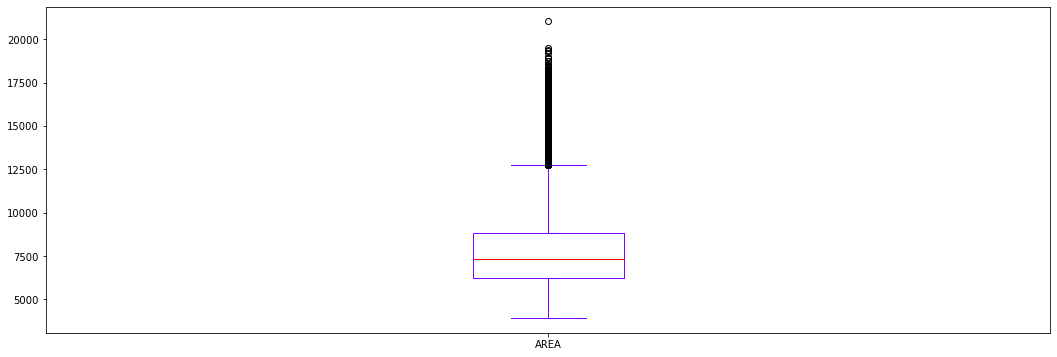

In [125]:
rice['AREA'].plot(kind='box',figsize=(18,6),colormap='rainbow')
plt.show()

In [126]:
#rice['skewCb'].describe()
rice[rice['skewCb']>4]['skewCb']

10969     68.0710
41681    120.6575
46919      4.9018
48927      4.0809
Name: skewCb, dtype: float64

## With Deleting Outliers

In [127]:
#columns=rice.columns[:-1]
columns=rice.columns

In [128]:
def removeoutliers(data,cols):
    #df_no_outlier=pd.DataFrame()    
    df_no_outlier=data.copy()
    for col in cols:
        Q1=rice[col].quantile(0.25)
        Q3=rice[col].quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-1.5*IQR
        Upper_Whisker = Q3+1.5*IQR
        
        if len(df_no_outlier[(df_no_outlier[col] < Lower_Whisker) | (df_no_outlier[col] > Upper_Whisker)]):
            df_no_outlier=df_no_outlier[(df_no_outlier[col]> Lower_Whisker) & (df_no_outlier[col]< Upper_Whisker)]
                                
    return df_no_outlier

In [129]:
df_no_outlier=removeoutliers(rice,columns)

In [170]:
df_no_outlier.shape

(34939, 107)

In [169]:
df_no_outlier['CLASS'].value_counts()

1    10195
4     9399
0     7856
3     7481
2        8
Name: CLASS, dtype: int64

In [131]:
pd.set_option('display.max_rows',120)

In [132]:
X=df_no_outlier.drop('CLASS',axis=1)
y=df_no_outlier['CLASS']

In [133]:
ss=StandardScaler()
X_scaled=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=11)

In [135]:
models= [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), BernoulliNB(), SVC()]

#### Logistic Regression

In [139]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,lr_pred)))

[[1554    0    4    2]
 [   0 2009    0    0]
 [   0    0 1541    0]
 [   1    0    0 1877]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      2009
           3       1.00      1.00      1.00      1541
           4       1.00      1.00      1.00      1878

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Accuracy Score 0.9989982827704637


#### KNeighborsClassifier

In [140]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=lr.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,knn_pred)))

[[1554    0    4    2]
 [   0 2009    0    0]
 [   0    0 1541    0]
 [   1    0    0 1877]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      2009
           3       1.00      1.00      1.00      1541
           4       1.00      1.00      1.00      1878

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Accuracy Score 0.9989982827704637


#### RandomForestClassifier

In [141]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=lr.predict(X_test)

print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,rf_pred)))

[[1554    0    4    2]
 [   0 2009    0    0]
 [   0    0 1541    0]
 [   1    0    0 1877]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      2009
           3       1.00      1.00      1.00      1541
           4       1.00      1.00      1.00      1878

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Accuracy Score 0.9989982827704637


#### SVC

In [142]:
svc=SVC()
svc.fit(X_train,y_train)
svc_pred=lr.predict(X_test)

print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,svc_pred)))

[[1554    0    4    2]
 [   0 2009    0    0]
 [   0    0 1541    0]
 [   1    0    0 1877]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      2009
           3       1.00      1.00      1.00      1541
           4       1.00      1.00      1.00      1878

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Accuracy Score 0.9989982827704637


In [137]:
#Valid options for scoring are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'log_loss', 
#                                'mean_absolute_error', 'mean_squared_error', 'precision', 'r2', 'recall', 'roc_auc']

recall = []
precision = []
f1=[]
accuracy=[]
for model in models:
    cv = cross_val_score(model, X_train, y_train, scoring='recall', cv=10).mean()
    recall.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='precision', cv=10).mean()
    precision.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='f1', cv=10).mean()
    f1.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10).mean()
    accuracy.append(cv)
    
modelname = ['LogisticRegression', 'KNeighborsClassifier','RandomForestClassifier', 'BernoulliNB', 'SVC']

score = pd.DataFrame({'Model': modelname, 'Precision': precision, 'Recall': recall, 'F1':f1, 'Accuracy':accuracy})
score.style.background_gradient(high=1,axis=0)

,Model,Precision,Recall,F1,Accuracy
0,LogisticRegression,nan,nan,nan,0.998605
1,KNeighborsClassifier,nan,nan,nan,0.996100
2,RandomForestClassifier,nan,nan,nan,0.998605
3,BernoulliNB,nan,nan,nan,0.971378
4,SVC,nan,nan,nan,0.998784


## Without Deleting Outliers

In [143]:
rice_copy=rice.copy(deep=True)

In [145]:
rice_copy.shape

(74703, 107)

In [148]:
rice_copy.sample(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
56109,5653,280.980,110.8279,65.5076,0.8066,84.8388,0.9871,5727,0.7173,1.6918,0.8998,0.7655,0.0196,0.0116,0.5860,0.9914,197.1083,198.8921,214.3807,14.8407,15.0443,16.6558,-1.4351,-1.4923,-1.7590,10.0568,10.1394,10.4880,-2337711104,-2384421632,-2810530304,0.6374,0.0803,0.8407,0.0753,0.0267,0.0653,-7.5637,-0.9773,-1.7585,63.8386,3.0556,10.4894,2029.9504,193.2838,1325.0194,204.9791,129.6703,119.9361,14.0247,1.2320,3.1158,-1.6957,-0.2637,0.8245,11.2782,2.0460,2.4805,-2543655936,-924961024,-779209088,187.8677,135.0941,125.9597,12.9056,2.6658,0.6931,-1.5538,-0.8557,0.2290,10.4258,2.5935,4.9665,-2101858688,-1012808512,-867505152,0.5610,0.5803,0.7267,0.0875,0.0911,0.1154,-0.6270,-0.5742,-0.8323,6.1397,6.0647,6.0750,1981.0986,1986.5520,1737.6398,98.5333,99.4241,107.1638,0.3187,0.0401,0.4203,102.4674,64.8348,59.9711,93.9164,67.5444,62.9807,0.2804,0.2900,0.3632,4
19311,6436,299.529,116.4042,70.9164,0.7930,90.5239,0.9833,6545,0.7773,1.6414,0.9015,0.7777,0.0181,0.0110,0.6048,0.9927,221.3227,220.0996,235.3030,18.6368,18.7049,19.7214,-1.9587,-1.9067,-2.1690,9.7946,9.5645,10.3427,-3435128832,-3394350336,-3926415872,0.6800,0.0646,0.9228,0.0102,0.0147,0.0773,3.1629,0.0000,-2.1688,75.2408,3.2317,10.3423,2293.9004,150.5558,777.0290,224.8521,130.6429,120.5392,17.2358,0.8589,1.7551,-2.0834,-0.0288,0.3546,10.5528,2.7609,3.3331,-3550521088,-1070511936,-896474048,206.8414,134.5143,127.2279,16.1376,1.6435,0.4239,-1.9578,-0.3575,1.3704,9.7437,3.2620,3.1007,-2959053056,-1141856768,-1009715328,0.7130,0.7344,0.9004,0.1211,0.1256,0.1513,-1.2192,-1.1610,-1.3998,5.8038,5.6719,6.1540,2010.6425,1918.4943,713.2708,110.6395,110.0296,117.6301,0.3400,0.0323,0.4613,112.4099,65.3214,60.2694,103.4055,67.2572,63.6136,0.3564,0.3670,0.4500,4
25727,7143,327.979,134.6560,67.9373,0.8634,95.3664,0.9813,7279,0.6783,1.9821,0.8344,0.7082,0.0189,0.0095,0.5016,0.9942,211.8699,212.3025,217.7561,14.1562,14.4333,14.3872,-2.2816,-2.2509,-2.2094,12.6303,12.2294,12.3698,-3454155008,-3470283264,-3666943232,0.6487,0.0281,0.8540,0.0452,0.0093,0.0564,-9.0506,1.3210,-2.2093,128.3568,6.1834,12.3678,2579.7764,42.6710,1586.1185,216.9348,128.3909,125.1655,13.2901,0.5986,1.1171,-2.3992,1.3445,-0.7496,13.3580,4.6281,3.7792,-3633972480,-1143372160,-1081034496,198.7378,130.3602,127.2054,12.3094,0.9512,0.4040,-2.2551,1.3006,1.4585,12.3667,4.2730,3.1272,-3000592640,-1182461056,-1120193536,0.6377,0.6670,0.7608,0.0871,0.0918,0.1031,-1.4571,-1.4573,-1.4096,7.7810,7.6979,7.7304,2508.8398,2452.0049,2086.0405,105.8785,106.0941,108.8203,0.3244,0.0141,0.4268,108.4131,64.1962,62.5830,99.3191,65.1802,63.6031,0.3186,0.3332,0.3801,0
15580,14936,483.076,195.2124,98.4185,0.8636,137.9025,0.9802,15238,0.7856,1.9835,0.8043,0.7064,0.0131,0.0066,0.4990,0.9898,233.6832,232.6516,227.9045,11.6936,11.5047,11.4505,-3.2941,-3.3798,-2.9731,19.5305,20.1276,17.8431,-8924920832,-8838466560,-8450256896,0.1446,0.0253,0.9171,0.0804,0.0159,0.0458,7.1758,1.9949,-3.3373,70.5145,6.9684,19.8004,1166.2281,84.8085,2090.4751,235.0307,127.8504,130.4029,10.4693,0.4963,1.5329,-3.4948,-0.5223,1.8

In [150]:
X=rice_copy.drop('CLASS',axis=1)
y=rice_copy['CLASS']

### Applying RobustScaler

In [149]:
from sklearn.preprocessing import RobustScaler

In [152]:
rs=RobustScaler()
X_scaled=pd.DataFrame(rs.fit_transform(X),columns=X.columns)

In [154]:
X_scaled.sample(2)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
51174,-0.859838,-0.299125,-0.154100,-0.806822,0.501905,-0.947824,-1.132743,-0.816581,0.026882,0.545602,-0.552399,-0.559337,0.945652,0.225806,-0.550627,-1.681319,0.357304,0.312895,0.516828,0.154722,0.210789,0.331198,-0.602080,-0.503157,-0.229992,0.137289,0.077698,-0.169139,0.523539,0.463207,0.492390,0.032895,0.155280,0.388715,-0.388889,-0.361111,0.341969,0.454867,-0.228988,-0.143279,-0.200770,1.385940,-0.198630,-0.631343,-0.028586,-0.989037,0.323871,0.141840,-0.266539,0.196370,-0.198242,-0.191068,-0.471081,1.089826,0.185791,0.055392,1.175122,1.220397,0.509237,1.005169,0.702054,0.336060,0.253464,-0.630043,0.213005,-0.203124,-0.280320,-0.513611,0.021753,0.932496,0.064769,1.120175,1.214763,0.508414,0.867613,0.946076,0.351960,0.330075,0.495673,0.276786,0.268657,0.411602,-0.834588,-0.802605,-0.565784,0.171198,0.185330,-0.041586,-1.105652,-1.267563,-0.958705,0.351826,0.307517,0.511146,0.033577,0.155280,0.385580,0.318105,0.14365,-0.267507,0.331075,0.254977,-0.631394,0.345000,0.323308,0.488994
60810,0.999615,0.775262,0.789188,-0.168174,0.578095,0.934096,-0.761062,1.005136,0.139188,0.693753,-0.743829,-0.662854,0.173913,-0.709677,-0.642473,-1.263736,0.386258,1.496262,1.095734,-0.937229,-0.640969,-0.774101,-1.358787,-1.713404,-1.269918,1.155975,1.337280,0.988339,-0.988674,-1.530455,-1.210358,-1.087719,0.718944,1.026646,-0.328704,0.000000,-0.704663,0.337820,-0.366897,-1.179284,-0.026029,0.954506,0.921574,1.410243,1.431866,-1.094883,1.255200,-3.529553,0.368190,-0.779229,1.179990,-0.060137,-1.633296,1.468473,-1.030081,1.286930,1.262084,-0.495346,-1.366233,-0.461435,-1.044126,1.151829,-0.228135,-6.999927,-0.781179,-0.134368,2.383492,-1.716203,1.236024,0.916701,1.364061,-0.015711,1.172625,-1.324057,-0.851666,-0.474488,0.996664,1.337594,1.186467,-0.625000,-0.439620,-0.588398,-2.377873,-2.397581,-1.906985,1.846909,1.862621,1.514529,0.444351,-0.899563,-1.781680,0.382306,1.491259,1.090977,-1.086131,0.717391,1.025078,1.250022,-3.53139,0.367689,1.148005,-0.227320,-7.004036,0.991667,1.333835,1.182390


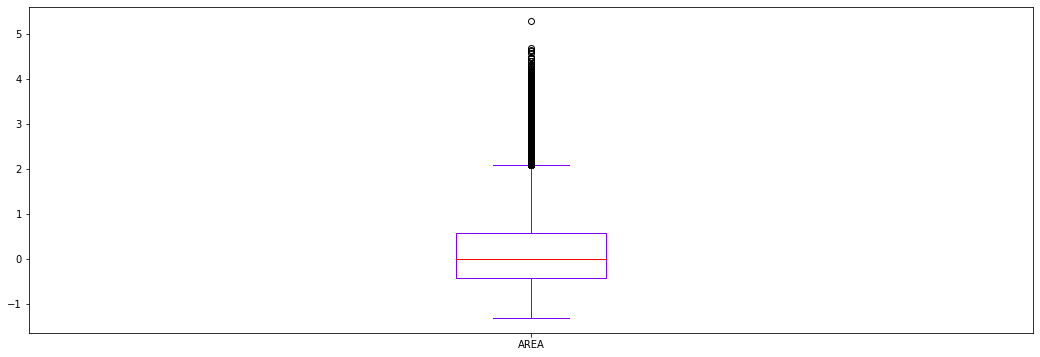

In [155]:
X_scaled['AREA'].plot(kind='box',figsize=(18,6),colormap='rainbow')
plt.show()

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=101)

#### LogisticRegression

In [157]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,lr_pred)))

[[2933    0    1   20    7]
 [   0 3007    0   23    0]
 [   2    0 2915    0    1]
 [   7   14    0 3009    1]
 [   8    0    1    2 2990]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2961
           1       1.00      0.99      0.99      3030
           2       1.00      1.00      1.00      2918
           3       0.99      0.99      0.99      3031
           4       1.00      1.00      1.00      3001

    accuracy                           0.99     14941
   macro avg       0.99      0.99      0.99     14941
weighted avg       0.99      0.99      0.99     14941

Accuracy Score 0.9941770965798808


#### KNeighborsClassifier

In [158]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=lr.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,knn_pred)))

[[2933    0    1   20    7]
 [   0 3007    0   23    0]
 [   2    0 2915    0    1]
 [   7   14    0 3009    1]
 [   8    0    1    2 2990]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2961
           1       1.00      0.99      0.99      3030
           2       1.00      1.00      1.00      2918
           3       0.99      0.99      0.99      3031
           4       1.00      1.00      1.00      3001

    accuracy                           0.99     14941
   macro avg       0.99      0.99      0.99     14941
weighted avg       0.99      0.99      0.99     14941

Accuracy Score 0.9941770965798808


#### RandomForestClassifier

In [159]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=lr.predict(X_test)

print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,rf_pred)))

[[2933    0    1   20    7]
 [   0 3007    0   23    0]
 [   2    0 2915    0    1]
 [   7   14    0 3009    1]
 [   8    0    1    2 2990]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2961
           1       1.00      0.99      0.99      3030
           2       1.00      1.00      1.00      2918
           3       0.99      0.99      0.99      3031
           4       1.00      1.00      1.00      3001

    accuracy                           0.99     14941
   macro avg       0.99      0.99      0.99     14941
weighted avg       0.99      0.99      0.99     14941

Accuracy Score 0.9941770965798808


#### SVC

In [160]:
svc=SVC()
svc.fit(X_train,y_train)
svc_pred=lr.predict(X_test)

print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,svc_pred)))

[[2933    0    1   20    7]
 [   0 3007    0   23    0]
 [   2    0 2915    0    1]
 [   7   14    0 3009    1]
 [   8    0    1    2 2990]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2961
           1       1.00      0.99      0.99      3030
           2       1.00      1.00      1.00      2918
           3       0.99      0.99      0.99      3031
           4       1.00      1.00      1.00      3001

    accuracy                           0.99     14941
   macro avg       0.99      0.99      0.99     14941
weighted avg       0.99      0.99      0.99     14941

Accuracy Score 0.9941770965798808


### Applying Standard Scaler

In [161]:
X=rice_copy.drop('CLASS',axis=1)
y=rice_copy['CLASS']

In [162]:
ss=StandardScaler()
X_scaled=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

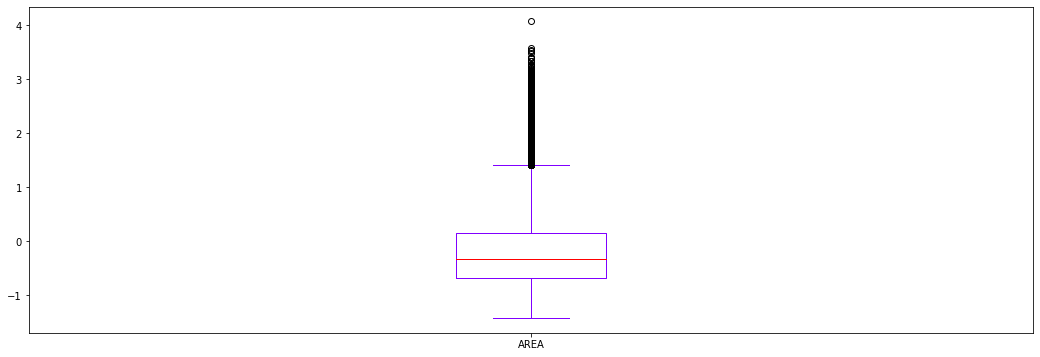

In [163]:
X_scaled['AREA'].plot(kind='box',figsize=(18,6),colormap='rainbow')
plt.show()

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=101)

#### LogisticRegression

In [165]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,lr_pred)))

[[2956    0    0    3    2]
 [   0 3026    0    4    0]
 [   0    0 2918    0    0]
 [   0    1    0 3030    0]
 [   1    0    0    0 3000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2961
           1       1.00      1.00      1.00      3030
           2       1.00      1.00      1.00      2918
           3       1.00      1.00      1.00      3031
           4       1.00      1.00      1.00      3001

    accuracy                           1.00     14941
   macro avg       1.00      1.00      1.00     14941
weighted avg       1.00      1.00      1.00     14941

Accuracy Score 0.999263770831939


#### KNeighborsClassifier

In [166]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=lr.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,knn_pred)))

[[2956    0    0    3    2]
 [   0 3026    0    4    0]
 [   0    0 2918    0    0]
 [   0    1    0 3030    0]
 [   1    0    0    0 3000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2961
           1       1.00      1.00      1.00      3030
           2       1.00      1.00      1.00      2918
           3       1.00      1.00      1.00      3031
           4       1.00      1.00      1.00      3001

    accuracy                           1.00     14941
   macro avg       1.00      1.00      1.00     14941
weighted avg       1.00      1.00      1.00     14941

Accuracy Score 0.999263770831939


#### RandomForestClassifier

In [167]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=lr.predict(X_test)

print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,rf_pred)))

[[2956    0    0    3    2]
 [   0 3026    0    4    0]
 [   0    0 2918    0    0]
 [   0    1    0 3030    0]
 [   1    0    0    0 3000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2961
           1       1.00      1.00      1.00      3030
           2       1.00      1.00      1.00      2918
           3       1.00      1.00      1.00      3031
           4       1.00      1.00      1.00      3001

    accuracy                           1.00     14941
   macro avg       1.00      1.00      1.00     14941
weighted avg       1.00      1.00      1.00     14941

Accuracy Score 0.999263770831939


#### SVC

In [168]:
svc=SVC()
svc.fit(X_train,y_train)
svc_pred=lr.predict(X_test)

print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,svc_pred)))

[[2956    0    0    3    2]
 [   0 3026    0    4    0]
 [   0    0 2918    0    0]
 [   0    1    0 3030    0]
 [   1    0    0    0 3000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2961
           1       1.00      1.00      1.00      3030
           2       1.00      1.00      1.00      2918
           3       1.00      1.00      1.00      3031
           4       1.00      1.00      1.00      3001

    accuracy                           1.00     14941
   macro avg       1.00      1.00      1.00     14941
weighted avg       1.00      1.00      1.00     14941

Accuracy Score 0.999263770831939
